## Visualização de dados 

Nesse arquivos iremos trabalhar  visualização de dados com python, através de criação de gráficos utilizando principalemnte a biblioteca matplot entre outras

In [8]:
from pegar_historico import pegar_historico
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Vou criar dois dataframes, um para o bitcoin e outro para o ethereum, para que se possa ter dados para iniciar a visualização dos mesmos

In [11]:

par = "BTCBRL"
intervalo = "1d"
data_inicio = "1 Jan 2025"

df_btcbrl = pegar_historico(
        par,
        intervalo,
        data_inicio
    )

#Criando Par de ETHBRL
par = "ETHBRL"
intervalo = "1d"
data_inicio = "1 Jan 2025"

df_ethbrl = pegar_historico(
        par,
        intervalo,
        data_inicio
    )

Como irei trabalhar apenas em cima variavel 'close", irei juntar em apenas uma tabela os valores de Close dos para bitcoin e ethereum

In [16]:
df_btceth_close = pd.DataFrame({
    'BTC_close':df_btcbrl['close'],
    'ETH_close':df_ethbrl['close']    
})

df_btceth_close.head(5)

,BTC_close,ETH_close
0,588693.0,20911.17
1,599306.0,21356.75
2,607582.0,22332.58
3,609413.0,22687.00
4,611273.0,22593.04


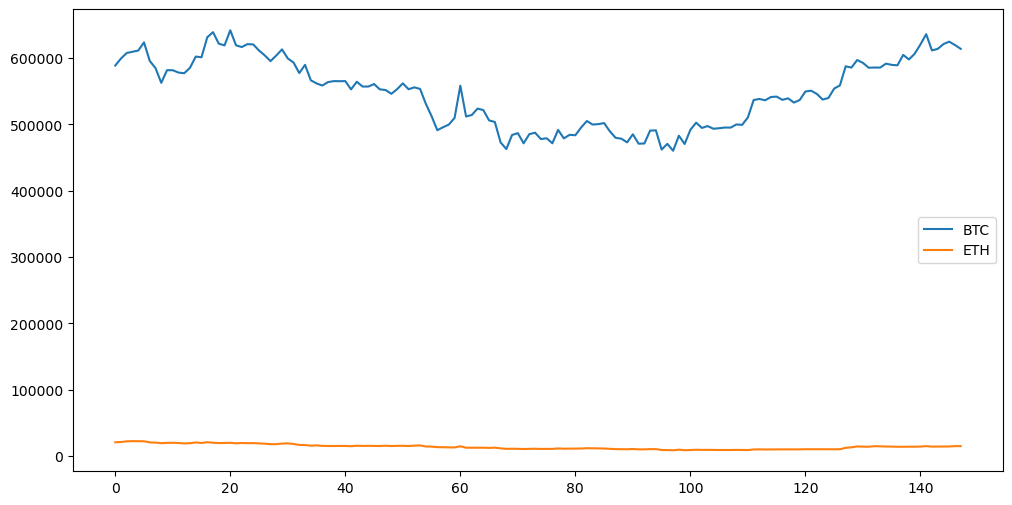

In [18]:
#Aqui o primeiro gráfico, 

plt.figure(figsize=(12,6))

plt.plot(df_btceth_close['BTC_close'], label="BTC")
plt.plot(df_btceth_close['ETH_close'], label="ETH")
plt.legend()

Nota-se que, os valores de ethereum são bem diferentes dos valores de BTC, portanto colocar ambos no mesmo gráfico utilizando os valores brutos, torna quase impossivel a comparação

Aqui eu vou precisar NORMALIZAR os valores, para que eles possam estar na mesma escala

In [35]:
# Normalizando para uma melhor visualização

# Criamos um novo DataFrame vazio que vai guardar os valores normalizados de BTC e ETH
df_norm = pd.DataFrame()

# Normalizando o preço de fechamento do Bitcoin (BTC)
# A ideia é transformar todos os preços em "porcentagem" com base no valor do primeiro dia
# Isso nos permite comparar as variações relativas entre BTC e ETH, mesmo que seus preços sejam muito diferentes

# Passo a passo do cálculo:
# - df_btceth_close['BTC_close']: pega a coluna com os preços diários do Bitcoin
# - df_btceth_close['BTC_close'].iloc[0]: pega o primeiro valor da série (preço inicial)
# - A divisão faz com que o valor do primeiro dia seja 1, e os outros valores sejam relativos a ele
# - Multiplicar por 100 converte isso em porcentagem: o primeiro valor vira 100 e os outros mostram o quanto subiram ou caíram em relação a esse valor

df_norm['BTC_norm'] = df_btceth_close['BTC_close'] / df_btceth_close['BTC_close'].iloc[0] * 100

# Fazemos o mesmo para o Ethereum (ETH)
df_norm['ETH_norm'] = df_btceth_close['ETH_close'] / df_btceth_close['ETH_close'].iloc[0] * 100


#Vamos verificar como ficou os valores
df_norm

,BTC_norm,ETH_norm
0,100.000000,100.000000
1,101.802807,102.130823
2,103.208633,106.797372
3,103.519661,108.492256
4,103.835616,108.042926
...,...,...
143,104.254510,68.903844
144,105.487240,69.518061
145,106.110316,69.980207
146,105.253672,72.375338


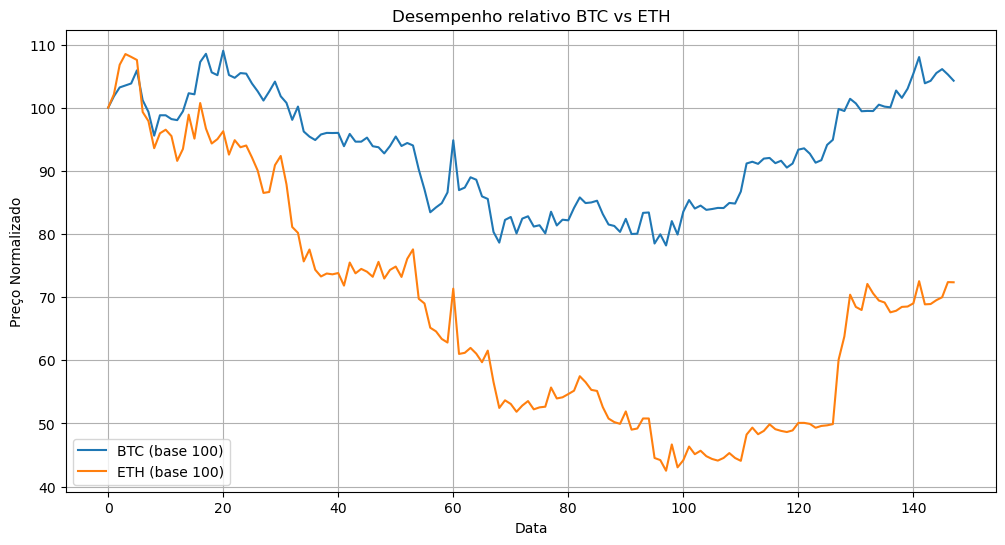

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df_norm['BTC_norm'], label='BTC (base 100)')
plt.plot(df_norm['ETH_norm'], label='ETH (base 100)')
plt.legend()
plt.title('Desempenho relativo BTC vs ETH')
plt.xlabel('Data')
plt.ylabel('Preço Normalizado')
plt.grid(True)
plt.show()

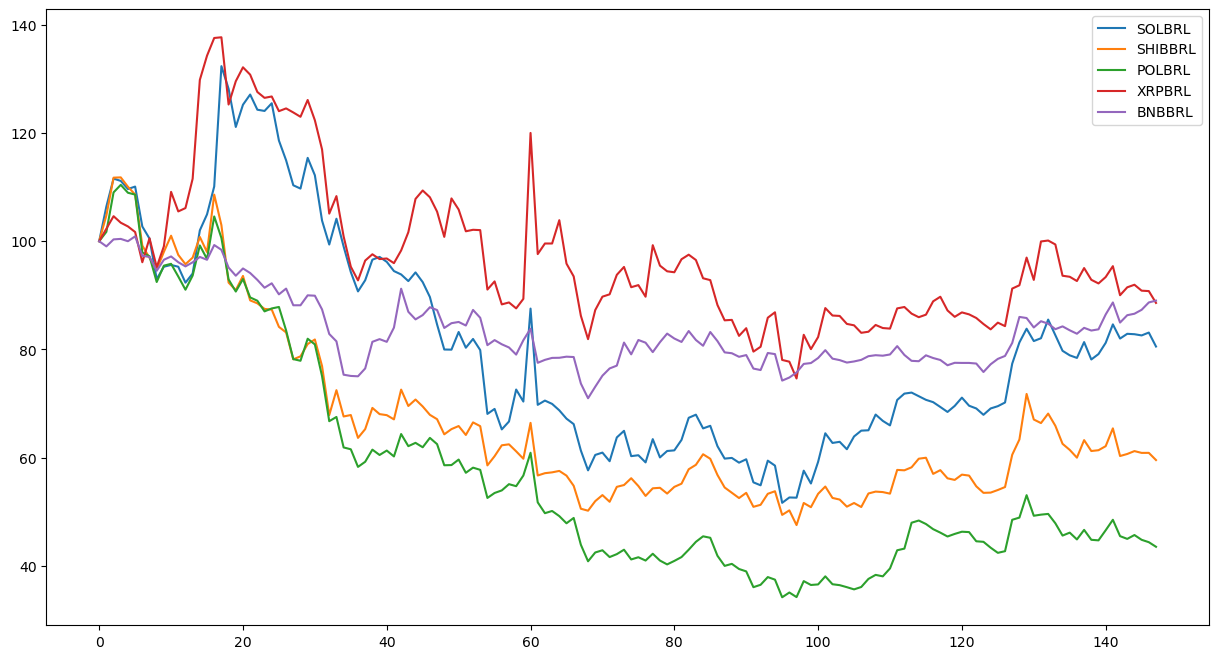

In [49]:
#Criando uma lista com o par de trading para cada alt coin desejada
pares = ["SOLBRL", "SHIBBRL","POLBRL","XRPBRL","BNBBRL"]

#O resto segue o mesmo
intervalo = "1d"
data_inicio = "1 Jan 2025"

#Criado um DataFrame Vazio
df_memecoins = pd.DataFrame()

for token in pares:
    #Inserindo valores no DataFrame Vazio
    df_memecoins[token] = pegar_historico(token, intervalo, data_inicio)['close']

#Aqui eu estou utilizando uma propriedade da biblioteca matplotlib para alterar o tamanho da image
#por serem varias criptomoedas ao mesmo tempo, é intessante ma imgem maior do que o tamanho padrao
plt.figure(
    figsize=(15,8)
)

#Normalizando todas as memcoins com 1 loop
for i in df_memecoins.columns:
    plt.plot(df_memecoins[i] / df_memecoins[i].iloc[0] * 100, label=i)


plt.legend()

## Suavizando a visualização de um gráfico de linha

Para suavizr a visualização, pode-se utilizar a média móvel, que é a média de uma quantidade de periodos anteriores

por exemplo, se você uma lista de 30 valores, por exemplo, os ultimos 30 valores de arroz ao decorer de 10 anos, você poderia tirar a média movel a cada 5 valores

exemplo:

<table border="1" cellpadding="5" cellspacing="0">
  <thead>
    <tr>
      <th>Preço do Arroz</th>
      <th>Média Móvel (5 períodos)</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>5.05</td><td></td></tr>
    <tr><td>5.15</td><td></td></tr>
    <tr><td>5.26</td><td></td></tr>
    <tr><td>5.36</td><td></td></tr>
    <tr><td>5.46</td><td>5.256</td></tr>
    <tr><td>5.56</td><td>5.358</td></tr>
    <tr><td>5.67</td><td>5.462</td></tr>
    <tr><td>5.77</td><td>5.564</td></tr>
    <tr><td>5.87</td><td>5.666</td></tr>
    <tr><td>5.97</td><td>5.768</td></tr>
    <tr><td>6.08</td><td>5.872</td></tr>
    <tr><td>6.18</td><td>5.974</td></tr>
    <tr><td>6.28</td><td>6.076</td></tr>
    <tr><td>6.39</td><td>6.18</td></tr>
    <tr><td>6.49</td><td>6.282</td></tr>
    <tr><td>6.59</td><td>6.386</td></tr>
    <tr><td>6.69</td><td>6.486</td></tr>
    <tr><td>6.8</td><td>6.59</td></tr>
    <tr><td>6.9</td><td>6.692</td></tr>
    <tr><td>7.0</td><td>6.796</td></tr>
    <tr><td>7.11</td><td>6.9</td></tr>
    <tr><td>7.21</td><td>7.004</td></tr>
    <tr><td>7.31</td><td>7.106</td></tr>
    <tr><td>7.41</td><td>7.208</td></tr>
    <tr><td>7.52</td><td>7.312</td></tr>
    <tr><td>7.62</td><td>7.416</td></tr>
    <tr><td>7.72</td><td>7.516</td></tr>
    <tr><td>7.82</td><td>7.616</td></tr>
    <tr><td>7.93</td><td>7.716</td></tr>
    <tr><td>8.03</td><td>7.824</td></tr>
  </tbody>
</table>

Mas deve-se levar consideração que média móvel fara perder a precisão dos valores

Text(0.5, 1.0, 'Gráfico de linhas com média móvel')

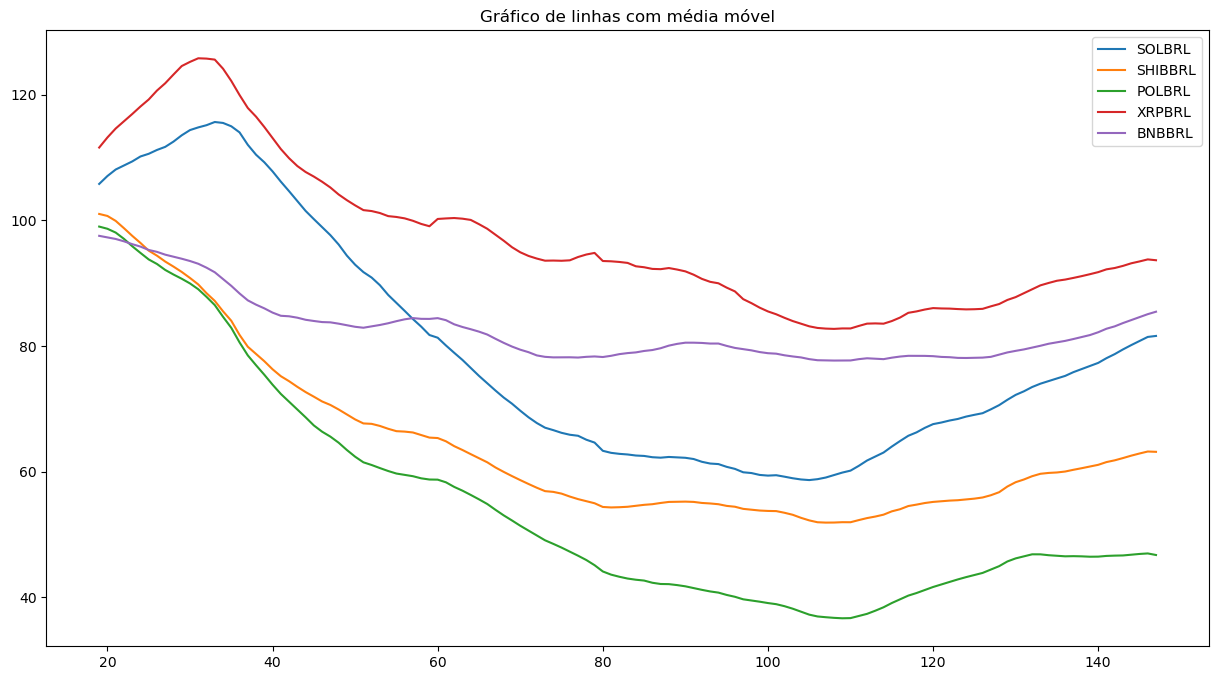

In [88]:
plt.figure(
    figsize=(15,8)
)

for i in df_memecoins.columns:
    plt.plot(                                             #Essa propriedade "rolling window" é onde se define o período da deseja para a média móve
        (df_memecoins[i] / df_memecoins[i].iloc[0] * 100).rolling(window=20).mean(), #usando o exemplo acima do arroz que era de 5 periodos, aqui eu defini 20 períodos
        label=i 
    )

plt.legend()
plt.title("Gráfico de linhas com média móvel")

Agora comparando os 2 gráficos de linha ao mesmo tempo

<>:13: SyntaxWarning: invalid escape sequence '\P'
<>:13: SyntaxWarning: invalid escape sequence '\P'
C:\Users\FilipeQueirozdeAbreu\AppData\Local\Temp\ipykernel_16480\194007827.py:13: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig('C:\Personal\python_bitcoin\post7.png')


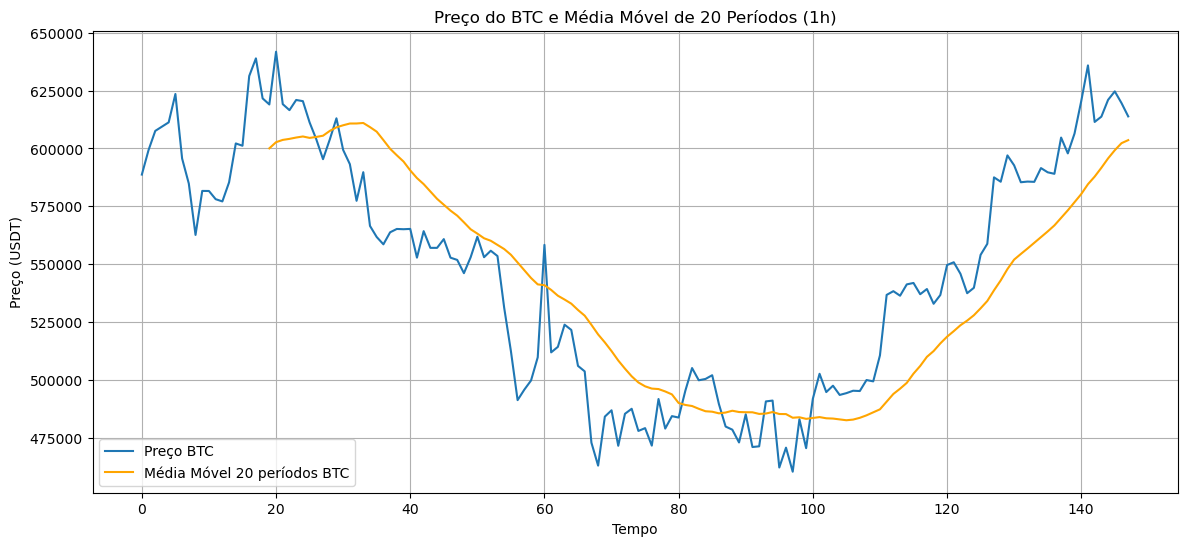

In [93]:
#Para comparar o quão mais facil é de visualizar, irei plotar os 2 gráfcos de linha ai nesni tempo
df_btceth_close['BTC_SMA20'] = df_btceth_close['BTC_close'].rolling(window=20).mean()

plt.figure(figsize=(14,6))
plt.plot(df_btceth_close['BTC_close'], label='Preço BTC')
plt.plot(df_btceth_close['BTC_SMA20'], label='Média Móvel 20 períodos BTC', color='orange')
plt.title('Preço do BTC e Média Móvel de 20 Períodos (1h)')
plt.xlabel('Tempo')
plt.ylabel('Preço (USDT)')
plt.legend()
plt.grid(True)

plt.savefig('C:\Personal\python_bitcoin\post7.png')
plt.show()

## Utilizando a biblioteca  plotly express para um gráfico de linha interativos

A biblioteca plotly permite criar gráficos similares ao da biblioteca matplotlib, contudo, a plotly permite algumas ações no gráficos, como no exemplo abaixo, ao passar o mouse por cima do gráfico, os valores serão exibidos, e pegar o último gráfico como exemplo

Essa biblioteca geralmente exige a instalação de um outra biblioteca chamada kaleido, então caso falhe a execução do código abaixo, faça a instalação da biblioteca kaleido utilizado o comando "!pip install -U kaleido"

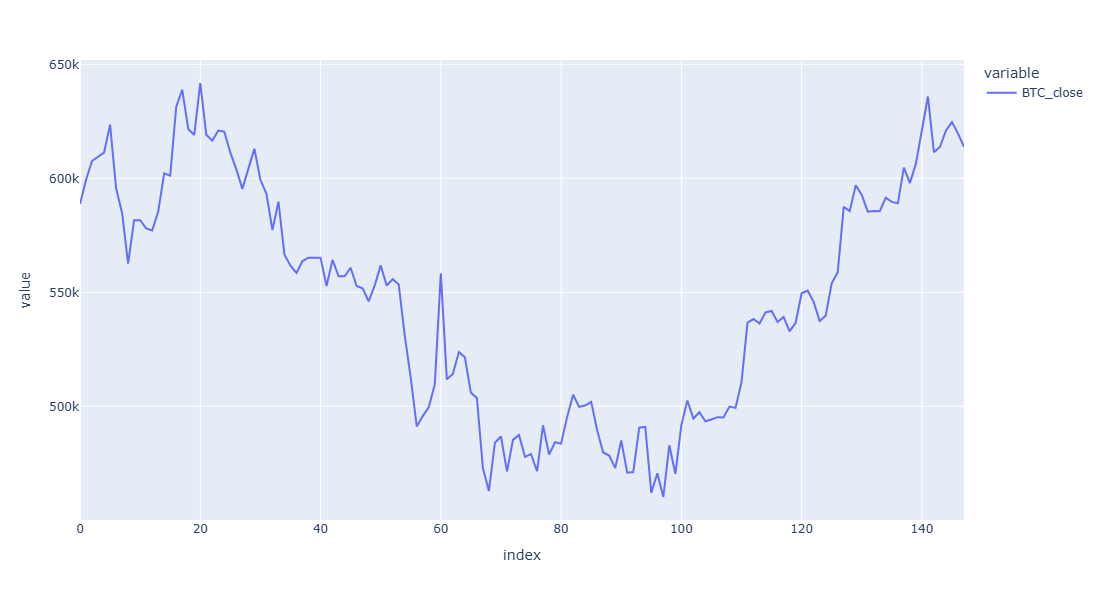

<Figure size 1200x800 with 0 Axes>

In [118]:
plt.figure(
    figsize=(12,8)
)

px.line(
    df_btceth_close['BTC_close'],
    width=1200,    # largura em pixels
    height=600     # altura em pixels
)


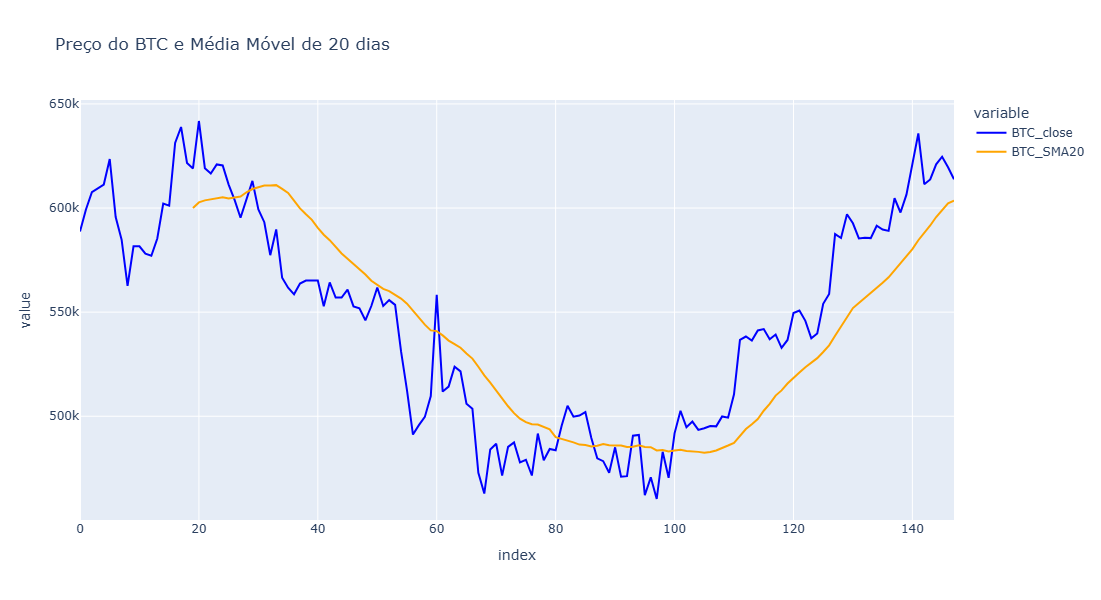

In [122]:
fig = px.line(
    df_btceth_close,
    y=['BTC_close', 'BTC_SMA20'],  # <- lista de colunas
    title='Preço do BTC e Média Móvel de 20 dias',
    width=1100,
    height=600
)

fig.update_traces(line=dict(color='blue'), selector=dict(name='BTC_close'))
fig.update_traces(line=dict(color='orange'), selector=dict(name='BTC_SMA20'))
fig.write_html("post9.html")
fig.show()

# Gráfico de velas

In [112]:
df_btcbrl

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,month
0,2025-01-01,583135.0,591233.0,579057.0,588693.0,72.14957,1735775999999,42310167.57540000,21358,41.00811000,24046544.55393000,0,2025-01
1,2025-01-02,588635.0,607111.0,587263.0,599306.0,166.56756,1735862399999,99793602.55375000,47531,78.05491000,46770433.42530000,0,2025-01
2,2025-01-03,599363.0,613793.0,594140.0,607582.0,128.54397,1735948799999,77592339.31612000,39792,61.49631000,37100120.06508000,0,2025-01
3,2025-01-04,607593.0,612902.0,604369.0,609413.0,64.64526,1736035199999,39296764.14958000,27377,31.38893000,19078907.64598000,0,2025-01
4,2025-01-05,609412.0,613000.0,604300.0,611273.0,58.20556,1736121599999,35453798.90673000,22973,27.81086000,16944045.55734000,0,2025-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2025-05-24,611512.0,623500.0,609189.0,613739.0,95.41308,1748131199999,58924299.90646000,28376,45.38092000,28019200.96760000,0,2025-05
144,2025-05-25,613679.0,621726.0,607709.0,620996.0,100.19147,1748217599999,61414527.07301000,21104,49.22882000,30187707.74336000,0,2025-05
145,2025-05-26,621150.0,629000.0,620268.0,624664.0,117.26857,1748303999999,73133496.33362000,27811,60.16149000,37523011.60443000,0,2025-05
146,2025-05-27,624583.0,630099.0,614528.0,619621.0,210.58732,1748390399999,131356406.23793000,40032,100.37962000,62627068.80313000,0,2025-05


{'month': 'Janeiro', 'start': 588693.0, 'end': 599359.0, 'variation_percent': 1.81}
{'month': 'Fevereiro', 'start': 593197.0, 'end': 499672.0, 'variation_percent': -15.77}
{'month': 'Março', 'start': 509701.0, 'end': 472887.0, 'variation_percent': -7.22}
{'month': 'Abril', 'start': 485056.0, 'end': 536632.0, 'variation_percent': 10.63}
{'month': 'Maio', 'start': 549579.0, 'end': 613849.0, 'variation_percent': 11.69}


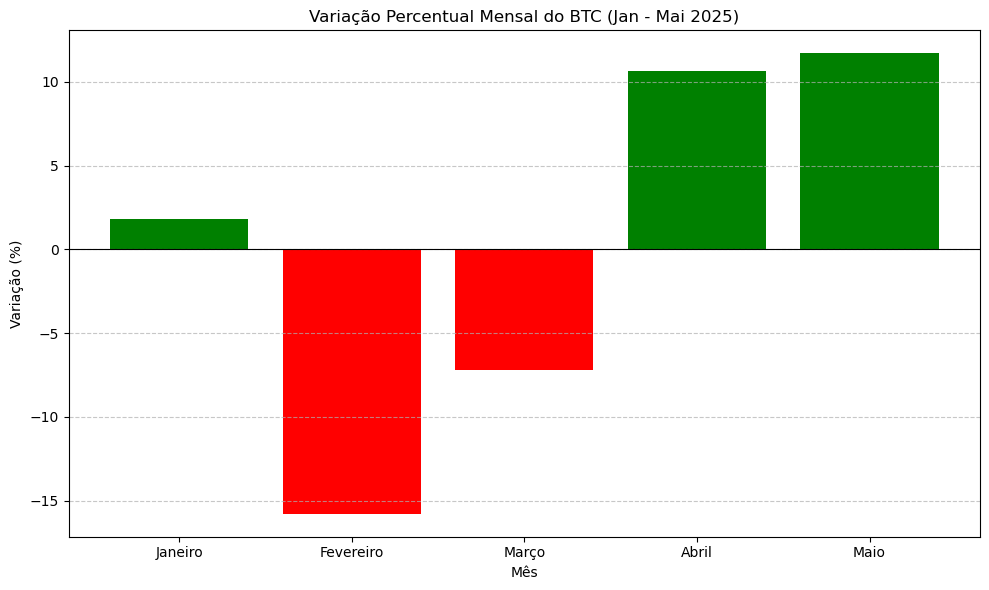

       month     start       end  variation_percent
0    Janeiro  588693.0  599359.0               1.81
1  Fevereiro  593197.0  499672.0             -15.77
2      Março  509701.0  472887.0              -7.22
3      Abril  485056.0  536632.0              10.63
4       Maio  549579.0  613849.0              11.69


In [114]:
# Agrupando os dados por mês
# Aqui, estamos criando uma nova coluna chamada 'month', que extrai apenas o ano e o mês da coluna 'timestamp'.
# Isso nos permite agrupar os dados por mês para fazer análises mensais.
df_btcbrl['month'] = df_btcbrl['timestamp'].dt.to_period('M')

# Criamos uma lista vazia para armazenar os resultados de cada mês
monthly_returns = []

# Para cada grupo mensal de preços do Bitcoin...
for month, group in df_btcbrl.groupby('month'):
    # Pegamos o primeiro preço de fechamento do mês
    first_price = group.iloc[0]['close']
    # Pegamos o último preço de fechamento do mês
    last_price = group.iloc[-1]['close']
    # Calculamos a variação percentual do mês:
    # Fórmula = (preço final - preço inicial) / preço inicial * 100
    variation = ((last_price - first_price) / first_price) * 100
    # Armazenamos os dados formatados com duas casas decimais
    monthly_returns.append({
        'month': str(month),                 # mês no formato YYYY-MM
        'start': round(first_price, 2),      # preço inicial do mês
        'end': round(last_price, 2),         # preço final do mês
        'variation_percent': round(variation, 2)  # variação em %
    })

# Lista com nomes dos meses em português
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio']

# Substituímos o valor 'YYYY-MM' pelo nome do mês correspondente
for i, item in enumerate(monthly_returns):
    item['month'] = meses[i]

# Convertemos a lista de dicionários em um DataFrame para facilitar o uso com gráficos e tabelas
returns_df = pd.DataFrame(monthly_returns)

# Começamos a construir o gráfico de barras
plt.figure(figsize=(10, 6))

# Definimos cores: verde para meses com variação positiva, vermelho para negativa
colors = ['green' if x > 0 else 'red' for x in returns_df['variation_percent']]

# Criamos o gráfico de barras com as variações mensais
plt.bar(returns_df['month'], returns_df['variation_percent'], color=colors)

# Títulos e eixos do gráfico
plt.title('Variação Percentual Mensal do BTC (Jan - Mai 2025)')
plt.ylabel('Variação (%)')
plt.xlabel('Mês')

# Linha horizontal no zero para facilitar visualização de variações negativas
plt.axhline(0, color='black', linewidth=0.8)

# Adicionamos uma grade horizontal suave
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajusta o layout automaticamente
plt.tight_layout()


# Exibimos o gráfico
plt.show()

# Exibimos a tabela final com os dados no terminal
print(returns_df)
